In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('1.01.Simple-linear-regression.csv')
print(df.shape)
df.head()

(84, 2)


,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


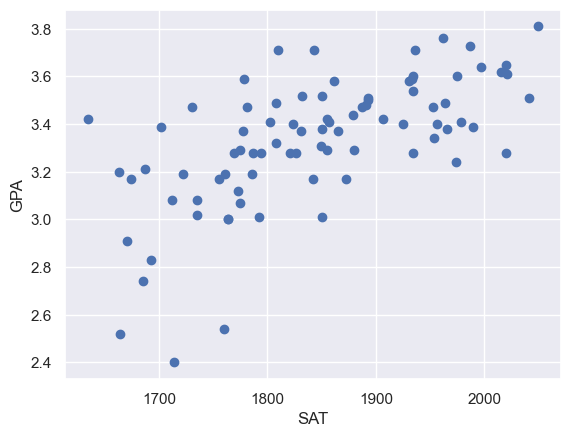

In [37]:
y = df['GPA']
x = df['SAT']
sns.set_theme()
plt.scatter(x , y)
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()

In [38]:
df.corr()

,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


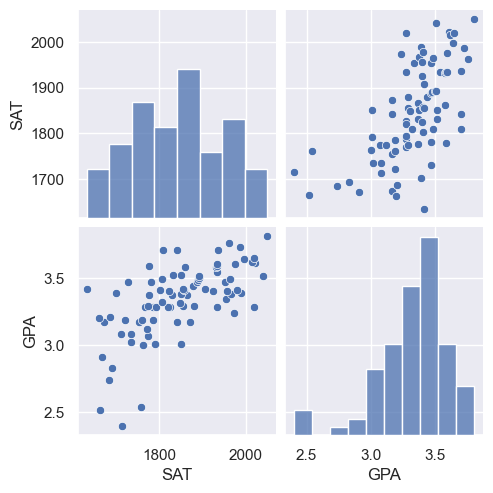

In [39]:
sns.pairplot(df)
plt.show()

In [40]:
X = df[['SAT']] #predictor
y = df['GPA'] #predicted

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state= 42)

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(67, 1) (17, 1) (67,) (17,)


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
X_train , X_test

(array([[ 1.39928415],
        [ 1.10678081],
        [ 1.2294435 ],
        [-0.69541718],
        [-0.75203073],
        [-0.16702405],
        [ 1.61630276],
        [ 0.01225219],
        [ 0.11604369],
        [-1.6861543 ],
        [ 0.71992156],
        [ 0.80484188],
        [ 0.29531993],
        [ 1.33323501],
        [ 1.89937051],
        [-0.88412902],
        [ 0.41798263],
        [-0.79920869],
        [ 0.80484188],
        [-1.12001881],
        [-0.59162568],
        [ 0.77653511],
        [-0.21420201],
        [-2.0258356 ],
        [-1.28985946],
        [ 0.41798263],
        [-1.54462043],
        [-1.64841194],
        [-0.676546  ],
        [-0.53501213],
        [ 0.01225219],
        [-0.79920869],
        [-0.38404266],
        [ 1.5691248 ],
        [-0.38404266],
        [-0.44065621],
        [-0.2330732 ],
        [ 1.06903845],
        [ 0.2198352 ],
        [-0.26137997],
        [ 0.01225219],
        [-0.58219009],
        [ 0.07830133],
        [ 1

In [45]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression

LinearRegression()

In [46]:
regression.fit(X_train, y_train)

LinearRegression()

In [47]:
print('Slope:', regression.coef_)
print('Intercept or constant:', regression.intercept_)

Slope: [0.155655]
Intercept or constant: 3.341044776119403


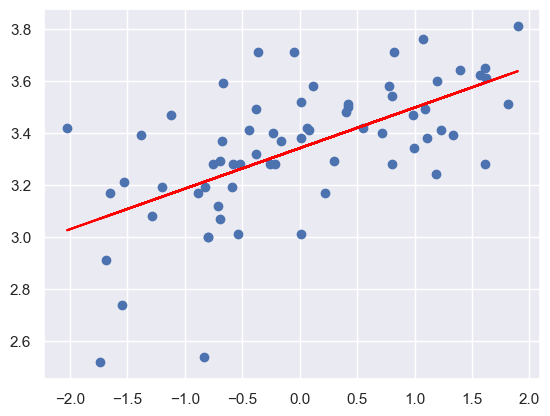

In [48]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color = 'red')
plt.show()

In [49]:
y_pred = regression.predict(X_test)
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error
mse = mean_squared_error(y_test , y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
print(mse)
print(mae)
print(rmse)

0.052486102697537236
0.16268831265429604
0.22909845634036305


In [50]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GPA   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.013
Method:                 Least Squares   F-statistic:                             0.1427
Date:                Fri, 26 Sep 2025   Prob (F-statistic):                       0.707
Time:                        06:25:58   Log-Likelihood:                         -176.01
No. Observations:                  67   AIC:                                      354.0
Df Residuals:                      66   BIC:                                      356.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1557      0.412      0.378      0.707      -0.667       0.978
==============================================================================
Omnibus:                        7.355   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.168
Skew:                          -0.572   Prob(JB):                       0.0278
Kurtosis:                       4.122   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""